<a href="https://colab.research.google.com/github/dlkt101101/AMATH-445/blob/main/AMATH445_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMATH 445
## Assignment 1
Prepared by: Darren Alexander Lam Kin Teng (20977843)

# Question 1


## 1a

1. From a given confusion matrix, we will get values for true positive (TP), true negative (TN), false positive (FP) and false negative (FP).
$$Precision = \frac{TP}{TP+FP}$$
$$Recall = \frac{TP}{TP + FN}$$

**Precision** is a measure of accuracy of the positive predictions out of all the instances that the model interpreted as positive (i.e. TP + FP).\
\
**Recall** is a measure of accuracy of the positive predictions out of all actual positive cases (i.e. TP + FN).\
\
2. $$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$
Accuracy alone can be a misleading metric for a classification problem as it does not represent the model's true performance well in the case of imbalanced data.\
For instance, if we have an imbalanced dataset where true labels are 5% of the data and 95% are negative labels. A model could predict all data points as negative. Therefore, accuracy = 95%, precision = $\frac{0}{0}$ and recall = 0%. Model performs poorly at predicting the true labels, based on the recall and precision, despite accuracy showing favourable results.

## 1b Data Preprocessing

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

Importing the dataset

In [89]:
data = pd.read_csv('/content/Cell viability and extrusion dataset V1.csv')

In [90]:
data.columns

Index(['Reference', 'DOI', 'Final_Alginate_Conc_(%w/v)',
       'Final_Gelatin_Conc_(%w/v)', 'Final_GelMA_Conc_(%w/v)',
       'Final_Hyaluronic_Acid_Conc_(%w/v)', 'Final_MeHA_Conc_(%w/v)',
       'Final_NorHA_Conc_(%w/v)', 'Final_Fibroin/Fibrinogen_Conc_(%w/v)',
       'Final_P127_Conc_(%w/v)', 'Final_Collagen_Conc_(%w/v)',
       'Final_Chitosan_Conc_(%w/v)', 'Final_CS-AEMA_Conc_(%w/v)',
       'Final_TCP_Conc_(%w/v)', 'Final_Gellan_Conc_(%w/v)',
       'Final_Nano/Methycellulose_Conc_(%w/v)', 'Final_PEGTA_Conc_(%w/v)',
       'Final_PEGMA_Conc_(%w/v)', 'Final_PEGDA_Conc_(%w/v)',
       'Final_Agarose_Conc_(%w/v)', 'CaCl2_Conc_(mM)', 'NaCl2_Conc_(mM)',
       'BaCl2_Conc_(mM)', 'SrCl2_Conc_(mM)',
       'Physical_Crosslinking_Durantion_(s)', 'Photocrosslinking_Duration_(s)',
       'Extrusion_Pressure (kPa)', 'Extrusion_Rate_Lengthwise_(mm/s)',
       'Extrusion_Rate_Volume-wise_(mL/s)', 'Nozzle_Movement_Speed_(mm/s)',
       'Inner_Nozzle_Outer_Diameter_(µm)', 'Outer_Nozzle_Inner_Di

In [91]:
df = data.copy()
df.drop(labels=['Reference', 'DOI', 'Acceptable_Pressure_(Yes/No)'], axis=1, inplace=True)
df.head()

,Final_Alginate_Conc_(%w/v),Final_Gelatin_Conc_(%w/v),Final_GelMA_Conc_(%w/v),Final_Hyaluronic_Acid_Conc_(%w/v),Final_MeHA_Conc_(%w/v),Final_NorHA_Conc_(%w/v),Final_Fibroin/Fibrinogen_Conc_(%w/v),Final_P127_Conc_(%w/v),Final_Collagen_Conc_(%w/v),Final_Chitosan_Conc_(%w/v),...,Saline_Solution_Used?,EtOH_Solution_Used?,Photoinitiator_Used?,Enzymatic_Crosslinker_Used?,Matrigel_Used?,Conical_or_Straight_Nozzle,Primary/Not_Primary,Viability_at_time_of_observation_(%),Acceptable_Viability_(Yes/No),Acceptable_Pressure_(Yes/No)
0,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,S,Primary,96.0,Y,Y
1,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,S,Primary,72.0,N,N
2,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,S,Primary,80.0,Y,Y
3,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,S,Primary,96.0,Y,Y
4,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,S,Primary,77.0,N,N


In [92]:
df.shape

(617, 49)

### Handling missing values for bioink temperature as described in the paper

In [93]:
df['Syringe_Temperature_(°C)'] = df['Syringe_Temperature_(°C)'].fillna(22)

### Removing features with more than 50% missing or zero values

In [94]:
null_percentage = round(df.isnull().sum()/df.shape[0] * 100,2)
null_percentage_50_names = null_percentage[null_percentage > 50].index
df.drop(labels=null_percentage_50_names, axis=1, inplace=True)
print("""Dropped columns with more than > 50% null values.
{}""".format(list(null_percentage_50_names)))


Dropped columns with more than > 50% null values. 
['Extrusion_Rate_Lengthwise_(mm/s)', 'Extrusion_Rate_Volume-wise_(mL/s)', 'Nozzle_Movement_Speed_(mm/s)', 'Fiber_Spacing_(µm)']


In [95]:
cols_object = df.select_dtypes(include=['object']).columns.tolist()
cols_numericals = df.select_dtypes(include=['number']).columns.tolist()

print('''All columns included: {}'''.format(len(cols_numericals) + len(cols_object) == df.shape[-1]))

All columns included: True


### Imputing missing values using KNNImputer and SimpleImputer from scikit-learn

In [96]:
cols_missing_value = df.isna().sum()
cols_to_impute = cols_missing_value[cols_missing_value > 0].index
cols_to_impute

Index(['Final_Collagen_Conc_(%w/v)', 'Final_PEGMA_Conc_(%w/v)',
       'CaCl2_Conc_(mM)', 'NaCl2_Conc_(mM)',
       'Physical_Crosslinking_Durantion_(s)', 'Extrusion_Pressure (kPa)',
       'Outer_Nozzle_Inner_Diameter_(µm)', 'Fiber_Diameter_(µm)',
       'Cell_Density_(cells/mL)', 'Substrate_Temperature_(°C)',
       'Conical_or_Straight_Nozzle'],
      dtype='object')

In [97]:
object_cols_to_impute = list(set(cols_object).intersection(set(cols_to_impute)))
object_cols_to_impute

['Conical_or_Straight_Nozzle', 'Fiber_Diameter_(µm)']

`Fiber_Diameter_(µm)` is supposed to be numerical but is type `object`. This needs to be fixed by removing any leading or trailing text.

In [98]:
df['Fiber_Diameter_(µm)'] = df['Fiber_Diameter_(µm)'].str.extract(r'(\d+\.?\d*)').astype(float)
cols_numericals = df.select_dtypes(include=['number']).columns.tolist()

In [99]:
cols_object = df.select_dtypes(include=['object']).columns.tolist()
df[cols_object] = df[cols_object].astype('category')

In [100]:
object_cols_to_impute = list(set(cols_object).intersection(set(cols_to_impute)))
object_cols_to_impute

['Conical_or_Straight_Nozzle']

`Conical_or_Straight_Nozzle` is a categroical data that cannot be imputed using KnnImputer. SimpleImputer will be used and replace missing values with the mode category.

In [101]:
simpleimputer = SimpleImputer(strategy = "most_frequent")

In [102]:
df[object_cols_to_impute] = simpleimputer.fit_transform(df[object_cols_to_impute])

In [103]:
numerical_cols_to_impute = list(set(cols_to_impute).intersection(set(cols_numericals)))
numerical_cols_to_impute

['CaCl2_Conc_(mM)',
 'NaCl2_Conc_(mM)',
 'Outer_Nozzle_Inner_Diameter_(µm)',
 'Cell_Density_(cells/mL)',
 'Physical_Crosslinking_Durantion_(s)',
 'Final_PEGMA_Conc_(%w/v)',
 'Substrate_Temperature_(°C)',
 'Final_Collagen_Conc_(%w/v)',
 'Extrusion_Pressure (kPa)',
 'Fiber_Diameter_(µm)']

Imputing numerical columns

In [104]:
knnimputer = KNNImputer(n_neighbors=30)

In [105]:
df[numerical_cols_to_impute] = knnimputer.fit_transform(df[numerical_cols_to_impute])

In [106]:
df.isna().sum().sum()
print("All missing values filled: {}". format(0 == df.isna().sum().sum()))

All missing values filled: True


### One Hot Encode categorical data

In [107]:
df[cols_object].nunique()

,0
Cell_Culture_Medium_Used?,2
DI_Water_Used?,2
Precrosslinking_Solution_Used?,2
Saline_Solution_Used?,2
EtOH_Solution_Used?,2
Photoinitiator_Used?,2
Enzymatic_Crosslinker_Used?,2
Matrigel_Used?,2
Conical_or_Straight_Nozzle,2
Primary/Not_Primary,2


In [108]:
ohe = OneHotEncoder(sparse_output=False, drop="first").set_output(transform="pandas")

In [109]:
encoded_data = ohe.fit_transform(df[cols_object])
df_encoded = df.drop(columns=cols_object).join(encoded_data)

df_encoded.head()

,Final_Alginate_Conc_(%w/v),Final_Gelatin_Conc_(%w/v),Final_GelMA_Conc_(%w/v),Final_Hyaluronic_Acid_Conc_(%w/v),Final_MeHA_Conc_(%w/v),Final_NorHA_Conc_(%w/v),Final_Fibroin/Fibrinogen_Conc_(%w/v),Final_P127_Conc_(%w/v),Final_Collagen_Conc_(%w/v),Final_Chitosan_Conc_(%w/v),...,Precrosslinking_Solution_Used?_Y,Saline_Solution_Used?_Y,EtOH_Solution_Used?_Y,Photoinitiator_Used?_Y,Enzymatic_Crosslinker_Used?_Y,Matrigel_Used?_Y,Conical_or_Straight_Nozzle_S,Primary/Not_Primary_Primary,Acceptable_Viability_(Yes/No)_Y,Acceptable_Pressure_(Yes/No)_Y
0,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Scaling continuous features with `MinMaxScaler`

In [110]:
minmaxScaler = MinMaxScaler().set_output(transform="pandas")

In [111]:
df_encoded[cols_numericals] = minmaxScaler.fit_transform(df_encoded[cols_numericals])
df_encoded_scaled = df_encoded.copy()

In [113]:
df_encoded_scaled.head()

,Final_Alginate_Conc_(%w/v),Final_Gelatin_Conc_(%w/v),Final_GelMA_Conc_(%w/v),Final_Hyaluronic_Acid_Conc_(%w/v),Final_MeHA_Conc_(%w/v),Final_NorHA_Conc_(%w/v),Final_Fibroin/Fibrinogen_Conc_(%w/v),Final_P127_Conc_(%w/v),Final_Collagen_Conc_(%w/v),Final_Chitosan_Conc_(%w/v),...,Precrosslinking_Solution_Used?_Y,Saline_Solution_Used?_Y,EtOH_Solution_Used?_Y,Photoinitiator_Used?_Y,Enzymatic_Crosslinker_Used?_Y,Matrigel_Used?_Y,Conical_or_Straight_Nozzle_S,Primary/Not_Primary_Primary,Acceptable_Viability_(Yes/No)_Y,Acceptable_Pressure_(Yes/No)_Y
0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## 1c Decision Tree Classifier

In [127]:
X = df_encoded_scaled.drop(columns=['Acceptable_Viability_(Yes/No)_Y'])
y = df_encoded_scaled['Acceptable_Viability_(Yes/No)_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Predictions

In [129]:
predictions_DT = model_DT.predict(X_test)

Decision Tree Performance

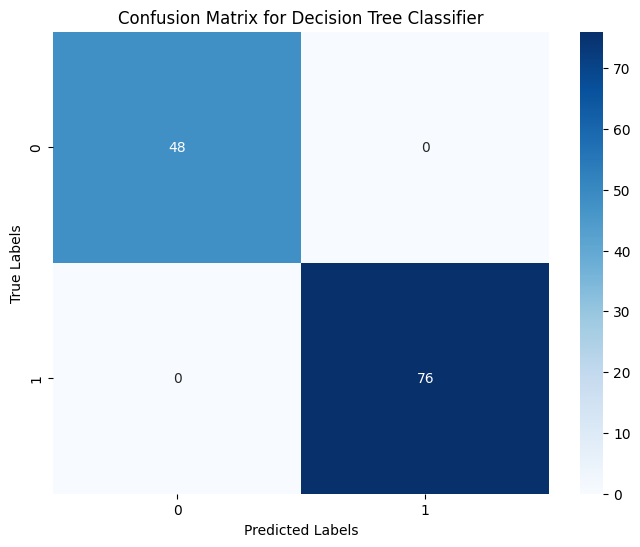

In [134]:
cm_DT = confusion_matrix(y_test, predictions_DT)

plt.figure(figsize=(8,6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [136]:
DT_report = classification_report(y_test, predictions_DT)
print(DT_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



## 1d Support Vector Machine (SVM)

In [137]:
model_svmRBF = SVC(random_state=42)
model_svmRBF.fit(X_train, y_train)

SVC(random_state=42)

SVM Radial Basis Function Predictions

In [139]:
predictions_svmRBF = model_svmRBF.predict(X_test)

SVM Performance

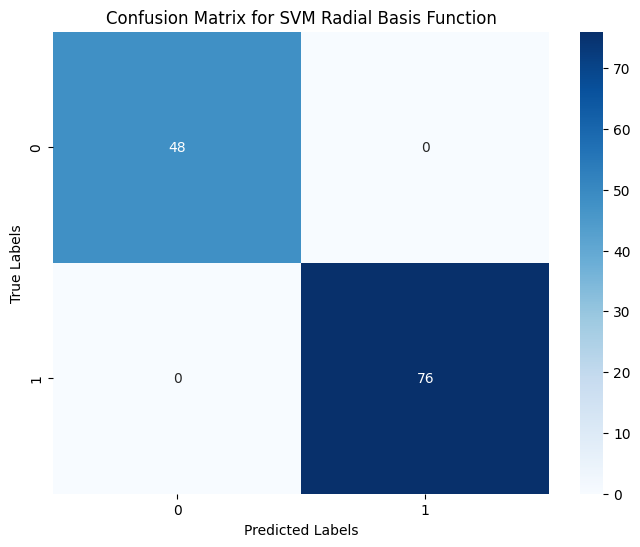

In [140]:
cm_svmRBF = confusion_matrix(y_test, predictions_svmRBF)

plt.figure(figsize=(8,6))
sns.heatmap(cm_svmRBF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Radial Basis Function')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Question 3

# Question 4